In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 flatten_2 (Flatten)         (None, 400)              

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 31s 63ms/step - loss: 2.3205 - accuracy: 0.0845 - val_loss: 2.3096 - val_accuracy: 0.0485
Epoch 2/2
469/469 [==============================] - 24s 50ms/step - loss: 2.3172 - accuracy: 0.0883 - val_loss: 2.3060 - val_accuracy: 0.0540


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.30600905418396
Test accuracy: 0.05400000140070915


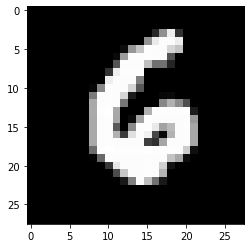

In [ ]:
import pylab as plt

plt.imshow(x_test[130:131].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
import numpy as np
prediction = model.predict(x_test[130:131])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1))

1/1 [==============================] - 0s 270ms/step
Prediction Score:
 [0.04635328 0.1971374  0.09714174 0.0856269  0.09554319 0.12607086
 0.08828516 0.07313626 0.10755599 0.08314925]

Thresholded Score:
 [0 0 0 0 0 0 0 0 0 0]

Predicted Digit:
 (array([], dtype=int64), array([], dtype=int64))


In [ ]:
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 8)       216       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 8)      32        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 8)       0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)      72        
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 8)      32        
 ation)                                         

In [ ]:
!wget https://notebooks.azure.com/vipulmishra/projects/labgail/raw/Cat.jpg

--2023-03-15 09:53:51--  https://notebooks.azure.com/vipulmishra/projects/labgail/raw/Cat.jpg
Resolving notebooks.azure.com (notebooks.azure.com)... 13.107.237.38, 13.107.238.38, 2620:1ec:4e:1::38, ...
Connecting to notebooks.azure.com (notebooks.azure.com)|13.107.237.38|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://visualstudio.microsoft.com/vs/features/notebooks-at-microsoft [following]
--2023-03-15 09:53:51--  https://visualstudio.microsoft.com/vs/features/notebooks-at-microsoft
Resolving visualstudio.microsoft.com (visualstudio.microsoft.com)... 23.60.121.74
Connecting to visualstudio.microsoft.com (visualstudio.microsoft.com)|23.60.121.74|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://visualstudio.microsoft.com/vs/features/notebooks-at-microsoft/ [following]
--2023-03-15 09:53:52--  https://visualstudio.microsoft.com/vs/features/notebooks-at-microsoft/
Reusing existing connecti

In [ ]:
# Write the image name below

img_path = 'Cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

AttributeError: ignored

In [ ]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)


Feature Shape:
 (1, 1000)

Features:
 [[1.66888913e-06 7.13712478e-04 1.65773949e-04 1.10442423e-04
  1.78126080e-04 4.26019914e-03 3.12949414e-04 1.41129553e-04
  6.23050655e-05 1.60201679e-07 9.00852172e-07 2.61550358e-05
  8.94293578e-07 1.74001452e-05 5.53141617e-05 3.42096632e-06
  2.29536290e-05 1.24991828e-04 2.50077574e-06 7.43013152e-06
  1.03183777e-06 1.27221181e-04 7.50785694e-06 6.57101191e-05
  2.86815452e-06 1.59369131e-06 5.43632996e-05 5.69003023e-05
  3.04480545e-05 3.72154475e-03 6.52500773e-07 4.07434391e-06
  2.95472978e-06 2.60654792e-06 2.85955139e-06 1.32700757e-06
  5.19292325e-06 2.66793165e-07 3.75387492e-04 9.01975272e-06
  9.18589649e-06 7.87469708e-06 1.11574482e-05 4.63036631e-05
  1.34447000e-05 7.70627594e-06 4.13208290e-05 1.56747512e-04
  1.50154918e-07 1.80126281e-05 6.31855801e-05 3.84678220e-04
  1.07686401e-05 4.20531542e-05 2.18738896e-05 2.58909786e-05
  4.34409340e-05 5.82936593e-07 2.88289320e-05 8.68797088e-06
  9.98507949e-06 1.99287228e-06

In [ ]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

Features of conv_dw_2_relu: (1, 56, 56, 16)


In [ ]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0727 18:11:57.166813 140145501456256 deprecation.py:323] From <ipython-input-14-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0727 18:11:57.178676 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0727 18:11:57.180489 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0727 18:11:57.570780 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0727 18:11:57.573707 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0727 18:11:57.668081 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

W0727 18:11:58.743405 140145501456256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


In [ ]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.16
step 200, training accuracy 0.64
step 300, training accuracy 0.76
step 400, training accuracy 0.92
step 500, training accuracy 0.9
step 600, training accuracy 0.86
step 700, training accuracy 0.86
step 800, training accuracy 0.88
step 900, training accuracy 0.84
step 1000, training accuracy 0.92


In [ ]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.912


### Get activation values and plotting

In [ ]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

### Input Image

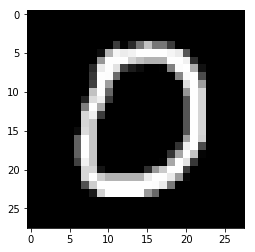

In [ ]:
imageToUse = mnist.test.images[10]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

### Activation in Layer 1

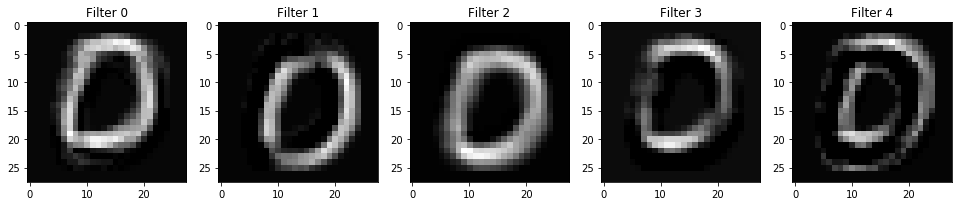

In [ ]:
getActivations(hidden_1,imageToUse)

### Activation in Layer 2

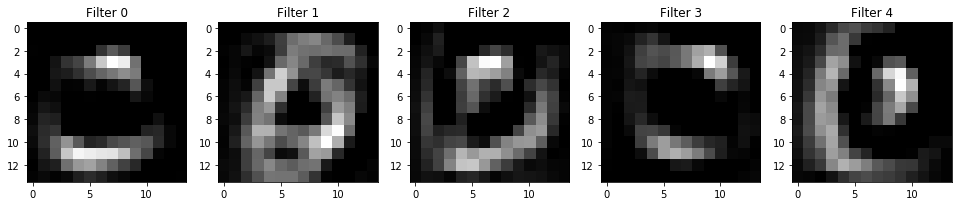

In [ ]:
getActivations(hidden_2,imageToUse)

### Activation in Layer 3

In [ ]:
getActivations(hidden_3,imageToUse)

NameError: ignored

In [ ]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 36s 59

In [ ]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(9, 9), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (9, 9), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

In [ ]:
# Write your code here 

# Use the same model design from the above cell 